In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('main_data.csv')

In [3]:
df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6062,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Comedy Drama Music Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter ...
6063,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
6064,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
6065,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


# Vectorizing and then calculating cosine similarity

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
vec = CountVectorizer()
vec_matrix = vec.fit_transform(df['comb'])

In [6]:
similarity = cosine_similarity(vec_matrix)

In [7]:
def recommend(movie):
    if movie not in df['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = df.loc[df['movie_title']==movie].index[0]
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(df['movie_title'][a])
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('similar movies to---> '+movie)
        plt.ylabel('cosine scores')
        return l

In [9]:
df['movie_title'].sample(10)

2871    the pursuit of d.b. cooper
2710                        quills
4040          the astronaut's wife
4196                       highway
3504       the great train robbery
5747        running with the devil
4447                     i origins
5070               the evil within
3584              the elephant man
3161                         sicko
Name: movie_title, dtype: object

['and so it goes',
 'american splendor',
 'buddy games',
 'albert nobbs',
 'blackbird',
 'damsel',
 'take the lead',
 'dead poets society',
 'wish i was here',
 "straight a's"]

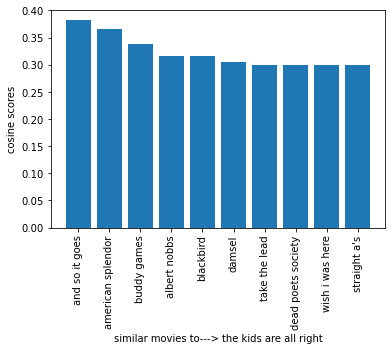

In [10]:
recommend('the kids are all right')

['inception',
 'the dark knight',
 'batman begins',
 'sin city: a dame to kill for',
 'premium rush',
 'the prestige',
 'rocknrolla',
 'don jon',
 'g.i. joe: the rise of cobra',
 'miracle at st. anna']

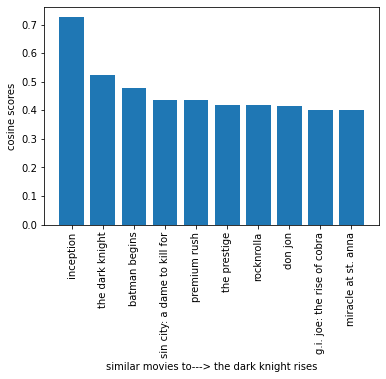

In [11]:
recommend('the dark knight rises')

['looney tunes: back in action',
 'garfield',
 'city of ember',
 'men in black 3',
 'wreck-it ralph',
 'toy story 2',
 'muppets from space',
 'home',
 'tmnt',
 'i married a strange person!']

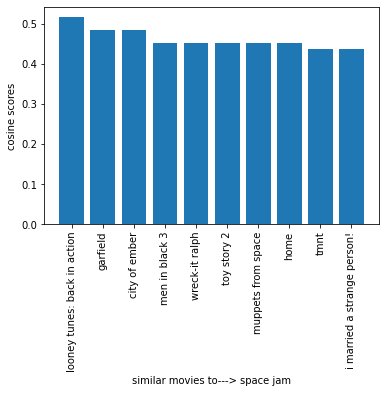

In [12]:
recommend('space jam')

["it's complicated",
 'what women want',
 'romance & cigarettes',
 "something's gotta give",
 'movie 43',
 'titanic',
 'revolutionary road',
 'the other woman',
 'the reader',
 "new year's eve"]

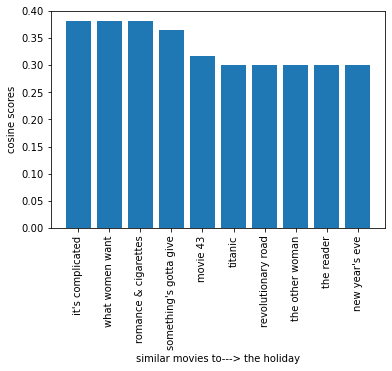

In [13]:
recommend('the holiday')

['the fifth estate',
 'atonement',
 'war horse',
 'tinker tailor soldier spy',
 'the other boleyn girl',
 'michael collins',
 'headhunters',
 'black mass',
 'lone survivor',
 'american sniper']

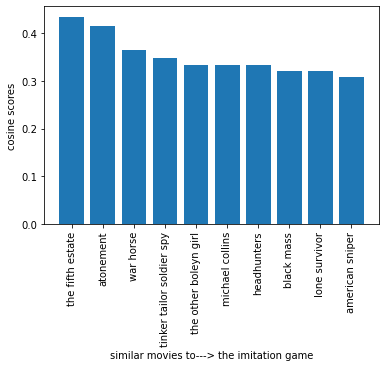

In [14]:
recommend('the imitation game')

['by the sea',
 'a mighty heart',
 'girl, interrupted',
 'courage',
 'the fighter',
 'alexander',
 'in the land of blood and honey',
 'beyond borders',
 'original sin',
 'moneyball']

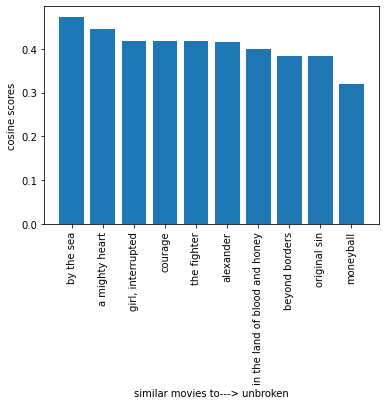

In [8]:
recommend('unbroken')